# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for regression
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202201

In [2]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display

# display.set_matplotlib_formats('svg')


In [3]:
def generateData(m=2):
    # create data
    N = 50
    x = torch.randn(N, 1)
    y = m * x + torch.randn(N, 1) / 2

    # and plot
    # plt.figure()
    # plt.plot(x, y, "s")
    # plt.show()

    return x, y


def buildTrainModel(x, y):
    # build model
    ANNreg = nn.Sequential(
        nn.Linear(1, 1),  # input layer
        nn.ReLU(),  # activation function
        nn.Linear(1, 1),  # output layer
    )

    # learning rate
    learningRate = 0.05

    # loss function
    lossfun = nn.MSELoss()

    # optimizer (the flavor of gradient descent to implement)
    optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learningRate)

    # train the model
    numepochs = 500
    losses = torch.zeros(numepochs)

    ## Train the model!
    for epochi in range(numepochs):

        # forward pass
        yHat = ANNreg(x)

        # compute loss
        loss = lossfun(yHat, y)
        losses[epochi] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # show the losses

    # manually compute losses
    # final forward pass
    predictions = ANNreg(x)

    # final loss (MSE)
    # testloss = lossfun(predictions,y).mean()
    testloss = (predictions - y).pow(2).mean()  # manual

    # plt.figure()
    # plt.plot(losses.detach(), "o", markerfacecolor="w", linewidth=0.1)
    # plt.plot(numepochs, testloss.detach(), "ro")
    # plt.xlabel("Epoch")
    # plt.ylabel("Loss")
    # plt.title("Final loss = %g" % testloss.item())
    # plt.show()

    # plot the data
    # plt.figure()
    # plt.plot(x,y,'bo',label='Real data')
    # plt.plot(x,predictions.detach(),'rs',label='Predictions')
    # plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
    # plt.legend()
    # plt.show()

    # return loss and accuracy
    acc = np.corrcoef(y.T,predictions.detach().T)[0,1]
    return testloss,acc


In [22]:
m = np.linspace(-2, 2, 21)
loss_mat = np.zeros((50, int(len(m))))
acc_mat = np.zeros((50, int(len(m))))

for trial in range(50):
    for idx, mi in enumerate(m):
        x, y = generateData(m=mi)
        loss, acc = buildTrainModel(x, y)
        loss_mat[trial, idx] = loss.item()
        acc_mat[trial, idx] = acc.item()

loss_mat[np.isnan(loss_mat)] = 0
acc_mat[np.isnan(acc_mat)] = 0

0.20874089002609253
0.226923868060112
1.8487945795059204
0.27903518080711365
0.2530917823314667
0.21407490968704224
4.678110122680664
0.34051936864852905
0.2714608311653137
0.2132103145122528
0.17847809195518494
1.133368968963623
0.23973064124584198
0.22063873708248138
0.47633975744247437
0.2487969547510147
0.1875731348991394
0.347040057182312
0.20271436870098114
0.4873005151748657
0.719617486000061
0.2655284106731415
0.273411363363266
0.260711669921875
0.32250919938087463
0.24045033752918243
0.2381601780653
4.107501983642578
4.64739990234375
0.19262287020683289
0.24887757003307343
2.3734781742095947
1.600795030593872
0.2565575838088989
0.23236969113349915
0.29118385910987854
0.22947660088539124
0.2477264553308487
0.2374429553747177
0.35636863112449646
0.22765931487083435
0.1982603669166565
0.2816307842731476
0.20918060839176178
1.588034987449646
0.40549007058143616
2.8880422115325928
4.373297214508057
0.2745751440525055
0.22747419774532318
0.20503300428390503
1.9847363233566284
0.3304

# Additional explorations

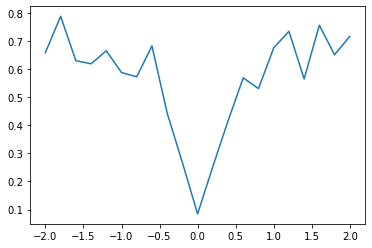

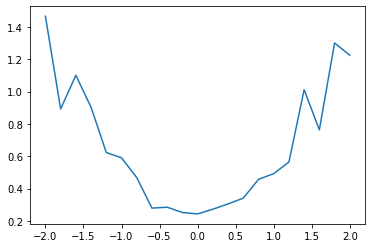

In [26]:
acc = np.mean(acc_mat,axis=0)
loss = np.mean(loss_mat,axis=0)

plt.figure()
plt.plot(m, acc)
plt.show()

plt.figure()
plt.plot(m, loss)
plt.show()


In [ ]:
# 1) How much data is "enough"? Try different values of N and see how low the loss gets. 
#    Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
# 
# 2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
#    by changing the division ("/2") when creating y as x+randn.
# 
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.